In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db=mysql.connector.connect(host='localhost',
    user='root',
    password='Kashyap@mysql888',
    database='ecommerce'
)

cur=db.cursor()

print("Connected")

Connected


# 1. List all unique cities where customers are located

In [4]:
query="""select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017

In [8]:
Query=""" select count(order_id) from orders where year(order_purchase_timestamp)='2017' """
cur.execute(Query)
data=cur.fetchall()

"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 45101)

# 3. Find the total sales per category

In [8]:
Query=""" select products.product_category as category,round(sum(payments.payment_value)) as sales from  products 
join orderitems ON
products.product_id=orderitems.product_id
JOIN
payments on
payments.order_id=orderitems.order_id
group by category """
cur.execute(Query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["Category","Sales"])
df

Category       Sales
0                     perfumery  18242592.0
1          Furniture Decoration  51486350.0
2                     telephony  17527754.0
3                bed table bath  61651932.0
4                    automotive  30682596.0
..                          ...         ...
69               cds music dvds     43179.0
70                   La Cuisine    104887.0
71  Fashion Children's Clothing     28284.0
72                     PC Gamer     78279.0
73       insurance and services     11682.0

[74 rows x 2 columns]

# 4. Calculate the percentage of orders that were paid in installments

In [23]:
Query=""" select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 from payments """
cur.execute(Query)
data=cur.fetchall()
'the percentage of orders that were paid in installments', data
df=pd.DataFrame(data, columns=['Percentage'])
df

Percentage
0    99.9981

# 5. Count the number of customers from each state

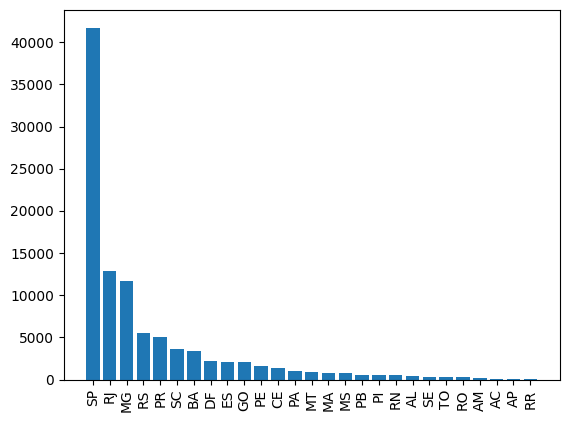

In [9]:
Query=""" select customer_state,count(customer_id) from customers group by customer_state """
cur.execute(Query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["State","Count"])
df=df.sort_values(by= "Count" , ascending=False) 
plt.bar (df['State'], df['Count'])
plt.xticks(rotation=90)
plt.show()

# 6.Calculate the number of orders per month in 2018

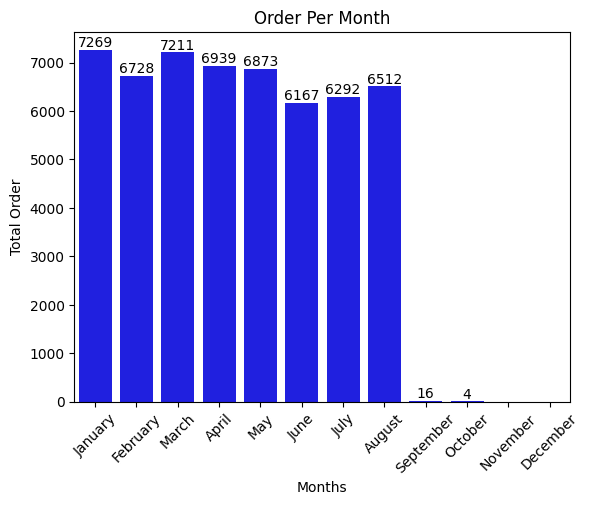

In [25]:
Query=""" Select COUNT(order_id), MONTHNAME(order_purchase_timestamp) from orders where YEAR(order_purchase_timestamp)=2018
group by  MONTHNAME(order_purchase_timestamp)  """
cur.execute(Query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["Total Order","Months"])
o=["January","February","March","April","May","June","July","August","September","October","November","December"]
#ax=sns.barplot(x= df["Months"], y=df["Total Order"], data=df, order=o, hue=df["Months"], palette='viridis')
ax=sns.barplot(x= df["Months"], y=df["Total Order"], data=df, order=o, color='Blue')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
#plt.xlabel("Months")
#plt.ylabel("Total")
plt.title("Order Per Month")
plt.show()

# 7.Find the average number of products per order, grouped by customer city

In [ ]:
query=""" with Count_orders as(
select orders.order_id,orders.customer_id, count(orderitems.order_id) as oc
from orders JOIN orderitems on
orders.order_id=orderitems.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city, round(avg(Count_orders.oc),2) as avg_orders
from customers JOIN Count_orders ON
customers.customer_id=Count_orders.customer_id
group by customers.customer_city
order by avg_orders DESC
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['City','Avg_Orders'])
df.head(10)


# 8.Calculate the percentage of total revenue contributed by each product category

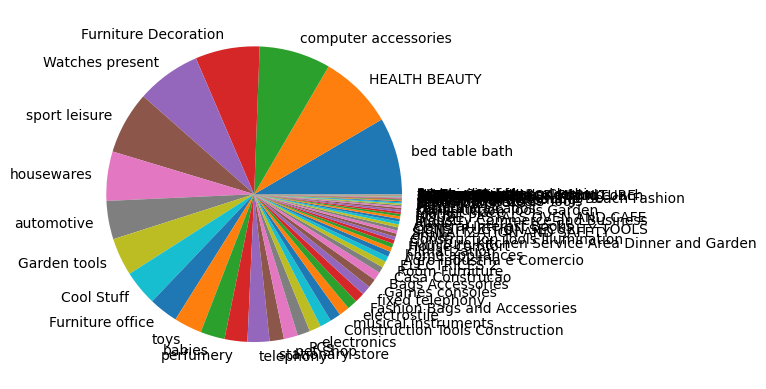

In [30]:
Query=""" select products.product_category as Category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) as sales_percentage
 from products
JOIN orderitems ON
products.product_id=orderitems.product_id JOIN payments ON
payments.order_id=orderitems.order_id
group by Category
order by sales_percentage DESC """
cur.execute(Query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Category','Sales_percentage'])
plt.pie(df['Sales_percentage'], labels= df['Category'])
plt.show()

# 9.Identify the correlation between product price and the number of times a product has been purchased

In [3]:
query=""" select products.product_category as Category,
count(orderitems.product_id), round(avg(orderitems.price),2)
 from products
JOIN orderitems ON
products.product_id=orderitems.product_id 
group by Category
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Category','Count','Avg_Price'])
arr1=df['Count']
arr2=df['Avg_Price']
a=np.corrcoef([arr1,arr2])
print("Correlation between product price and the number of times a product has been purchased is",a[0][-1])

Correlation between product price and the number of times a product has been purchased is -0.1063151416715757


# 10.Calculate the total revenue generated by each seller, and rank them by revenue

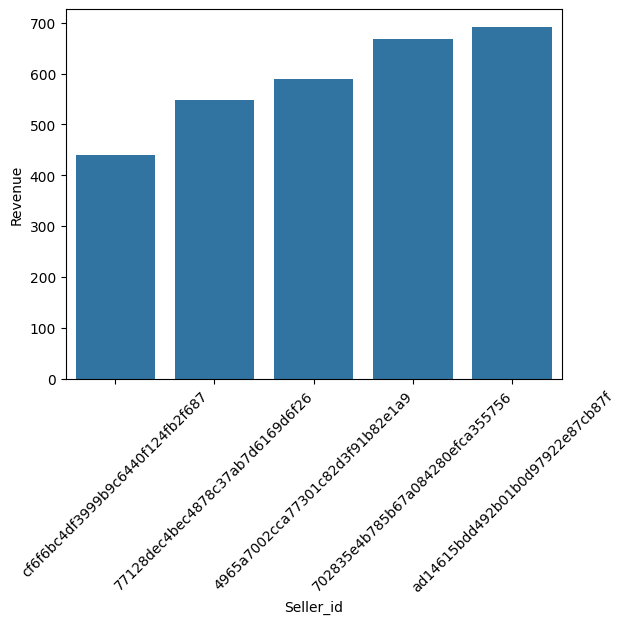

In [27]:
query=""" select *, dense_rank() over(order by revenue) as rn from
(select orderitems.seller_id,sum(payments.payment_value) as revenue from orderitems
JOIN payments ON
orderitems.order_id=payments.order_id
group by orderitems.seller_id) as a """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Seller_id','Revenue','Rank'])
df=df.head()
sns.barplot(x='Seller_id',y='Revenue', data=df)
plt.xticks(rotation=45)
plt.show()

# 11.Calculate the moving average of order values for each customer over their order history

In [ ]:
query=""" select customer_id,order_purchase_timestamp,payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp  rows between 2 preceding and current row) as mov_avg from
(select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payment
from payments JOIN orders ON
payments.order_id=orders.order_id) a """
cur.execute(query)
data=cur.fetchall()
data


# 12.Calculate the cumulative sales per month for each year

In [ ]:
query="""select Year,Month, payment,sum(payment) over (order by YEAR,MONTH) as cummilative from
(select YEAR(order_purchase_timestamp) Year, MONTH(order_purchase_timestamp) Month, round(sum(payments.payment_value),2) as payment
from orders JOIN payments ON
orders.order_id=payments.order_id
group by YEAR,MONTH
order by YEAR,MONTH) as a
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

# 13.Calculate the year-over-year growth rate of total sales

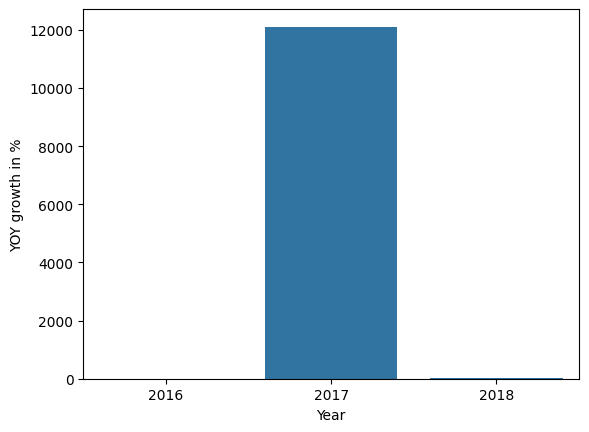

In [28]:
query="""with CTE as(select YEAR(order_purchase_timestamp) Year,round(sum(payments.payment_value),2) as payment
from orders JOIN payments ON
orders.order_id=payments.order_id
group by YEAR
order by YEAR)
select year,((payment-lag(payment,1) over(order by year))/(lag(payment,1) over(order by year)))* 100 as yoy_growth  from CTE"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Year','YOY growth in %'])
sns.barplot(x='Year',y='YOY growth in %', data=df)
plt.show()

# 14.Identify the top 3 customers who spent the most money in each year.

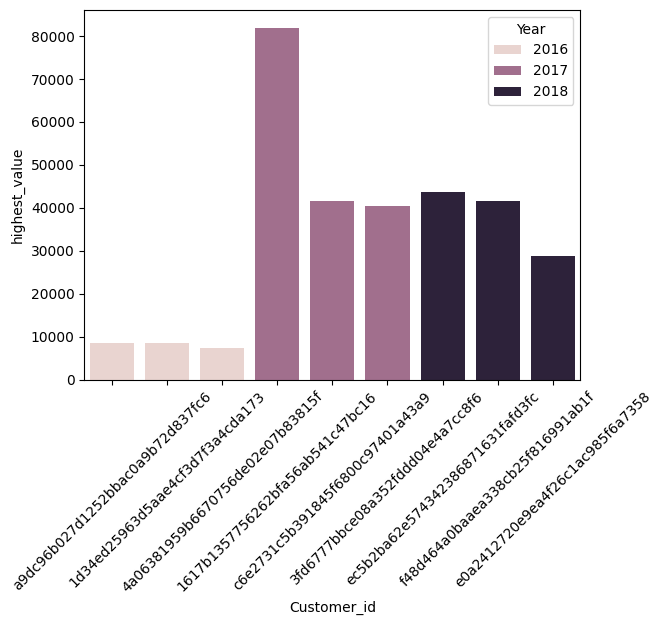

In [29]:
query=""" with CTE as (select YEAR(orders.order_purchase_timestamp) as Year,orders.customer_id, sum(payments.payment_value) as highest_value,
dense_rank() over (partition by YEAR(orders.order_purchase_timestamp) order by sum(payments.payment_value) DESC) as ra
from orders join payments on
orders.order_id=payments.order_id
group by Year,orders.customer_id)

select Year,Customer_id,round(highest_value,2) from CTE where ra<=3 """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Year','Customer_id','highest_value'])
sns.barplot(x="Customer_id",y="highest_value",data=df, hue='Year')
plt.xticks(rotation=45)
plt.show()
